<a href="https://colab.research.google.com/github/JyothiSridevi/Network-Anomaly-Detection/blob/main/Network_Anamoly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Setting up Environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
col = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]
df = pd.read_csv('Test.txt', sep = ',',names = col)

In [ ]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
df.shape

(22544, 43)

In [ ]:
df.select_dtypes(exclude = [np.number])

,protocoltype,service,flag,attack
0,tcp,private,REJ,neptune
1,tcp,private,REJ,neptune
2,tcp,ftp_data,SF,normal
3,icmp,eco_i,SF,saint
4,tcp,telnet,RSTO,mscan
...,...,...,...,...
22539,tcp,smtp,SF,normal
22540,tcp,http,SF,normal
22541,tcp,http,SF,back
22542,udp,domain_u,SF,normal


In [ ]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [ ]:
df.shape

(22544, 39)

In [ ]:
df.isna().sum()

,0
duration,0
protocoltype,0
service,0
flag,0
srcbytes,0
dstbytes,0
wrongfragment,0
hot,0
loggedin,0
numcompromised,0


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()

In [ ]:
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

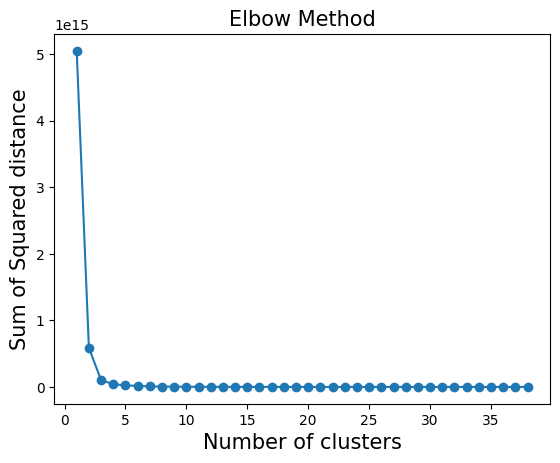

In [ ]:
import matplotlib.pyplot as plt
a=[]
K=range(1,39)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df)
    a.append(kmean.inertia_)

plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5,random_state = 111)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=111)

In [ ]:
pd.Series(kmeans.labels_).value_counts()

,count
0,22303
4,236
3,3
1,1
2,1


In [ ]:
df['cluster_label'] = kmeans.fit_predict(df)
df[df['cluster_label'] != 0]

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,cluster_label
61,280,1,19,9,283618,0,0,0,0,0,...,0.29,0.86,0.20,0.00,0.00,0.0,0.0,33,9,4
281,280,1,19,9,283618,0,0,0,0,0,...,0.09,0.14,0.33,0.00,0.00,0.0,0.0,33,2,4
325,280,1,19,9,283618,0,0,0,0,0,...,0.00,1.00,0.25,0.00,0.00,0.0,0.0,33,18,4
481,280,1,19,9,283618,0,0,0,0,0,...,0.00,1.00,0.13,0.00,0.00,0.0,0.0,33,18,4
524,280,1,19,9,283618,0,0,0,0,0,...,0.00,1.00,0.14,0.00,0.00,0.0,0.0,33,19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22152,280,1,19,9,283618,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.0,0.0,33,16,4
22231,0,1,19,6,176412,0,0,0,0,0,...,0.00,1.00,0.00,0.12,0.12,0.0,0.0,33,13,4
22323,280,1,19,9,283618,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.0,0.0,33,15,4
22425,281,1,19,9,283618,0,0,0,0,0,...,0.22,0.67,0.00,0.00,0.00,0.0,0.0,33,4,4


In [ ]:
from sklearn import metrics
metrics.silhouette_score(df, kmeans.labels_)

0.9695483208266737

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroid_diff = np.diff(centroids, axis=0)
feature_importance = np.abs(centroid_diff)
avg_importance = np.mean(feature_importance, axis=0)  # Calculate average importance across clusters
sorted_indices = np.argsort(avg_importance)[::-1]
column_names = df.columns

# Get column names of respective features in descending order of importance
sorted_column_names = column_names[sorted_indices]

# Get feature importance scores in descending order of importance
sorted_importance_scores = avg_importance[sorted_indices]

# Print column names along with feature importance scores
for col_name, importance_score in zip(sorted_column_names, sorted_importance_scores):
    print(f"Feature: {col_name}, Importance: {importance_score}")

Feature: srcbytes, Importance: 31338519.75717687
Feature: dstbytes, Importance: 103835.12025687052
Feature: duration, Importance: 221.46545592787191
Feature: dsthostcount, Importance: 92.22372346541513
Feature: dsthostsrvcount, Importance: 72.33148879353216
Feature: count, Importance: 19.89813846582909
Feature: attack, Importance: 13.675371159310483
Feature: service, Importance: 12.249800798250902
Feature: lastflag, Importance: 8.93470235693255
Feature: srvcount, Importance: 7.819988779346334
Feature: flag, Importance: 0.543492191899398
Feature: dsthostsamesrvrate, Importance: 0.34235823048050873
Feature: dsthostsamesrcportrate, Importance: 0.22695604243405634
Feature: dsthostdiffsrvrate, Importance: 0.11575289474244173
Feature: loggedin, Importance: 0.11174505671882798
Feature: hot, Importance: 0.07694260177812981
Feature: samesrvrate, Importance: 0.06683108679610694
Feature: srvrerrorrate, Importance: 0.060268499639404206
Feature: rerrorrate, Importance: 0.06025994260861765
Feature: 

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# Create an instance of the IsolationForest class
clf = IsolationForest(random_state=42)
# Fit the model to the data
clf.fit(df)
# Predict if each point is an outlier or not
y_pred = clf.predict(df)
# Print the results
print(y_pred)

[1 1 1 ... 1 1 1]


In [ ]:
anomaly_scores = clf.decision_function(df)
anomaly_scores = -anomaly_scores

# Display the anomaly scores
print("Anomaly Scores:")
print(anomaly_scores)

Anomaly Scores:
[-0.10769655 -0.09641936 -0.11022111 ... -0.03348497 -0.11928475
 -0.02386269]


In [ ]:
threshold = -0.19

anomalies = [anomaly_scores <threshold]
for i in anomalies:
    if i.all() == True:
        print(i)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
from keras.layers import Input, Dense
from keras.models import Model
input_dim = df.shape[1]  # Number of features
encoding_dim = 32  # Dimension of the encoded representations

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4832232448.0000 - val_loss: 27800824.0000
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2853686016.0000 - val_loss: 27800814.0000
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2793935104.0000 - val_loss: 27800814.0000
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3430426624.0000 - val_loss: 27800814.0000
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12706963456.0000 - val_loss: 27800814.0000
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5186461696.0000 - val_loss: 27800814.0000
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1752668800.0000 - val_loss: 27800814.0000
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4778771456.0000 - val_loss: 27800814.0000
Epoch 9/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3659028992.0000 - val_loss: 27800814.0000
Epoch 10/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 28055556096.0000 - v

In [ ]:
# Making predictions on the test set
reconstructed = autoencoder.predict(X_test)

# Calculating reconstruction error (MSE) for each sample
mse = np.mean(np.square(X_test - reconstructed), axis=1)

# Define a threshold for anomaly detection
threshold = np.mean(mse) + 2 * np.std(mse)  # Adjust this threshold as needed

# Detect anomalies based on the threshold
anomalies = mse > threshold

# Print the indices of anomalies
print("Indices of anomalies:")
print(np.where(anomalies)[0])

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Indices of anomalies:
[  13   14   39   89  249  354  394  584  641  667  775  845  861  919
  930  947  978 1026 1035 1097 1159 1186 1331 1377 1401 1548 1567 1603
 1609 1615 1634 1658 1743 1752 1903 1934 1992 2085 2090 2109 2418 2630
 2721 2906 2908 2963 3085 3347 3414 3663 4125 4466 4484]
